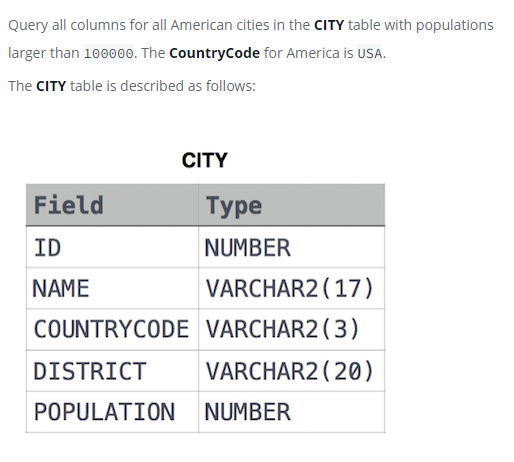

In [ ]:
select * from city where countrycode="USA" and population>100000;

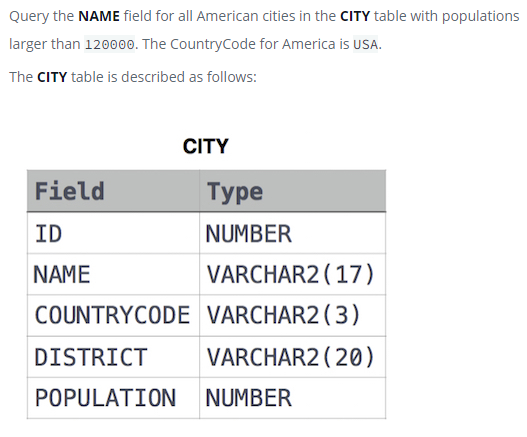

In [ ]:
Select name from city where countrycode="USA" and population>120000;

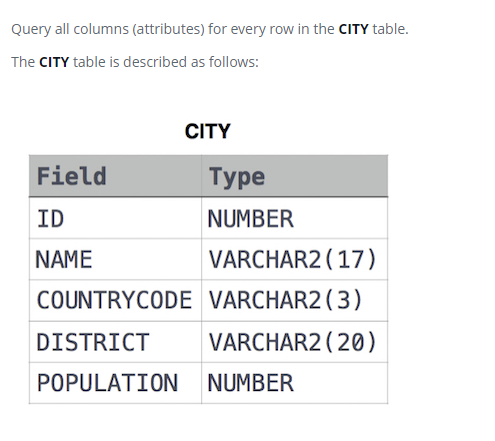

In [ ]:
select * from city

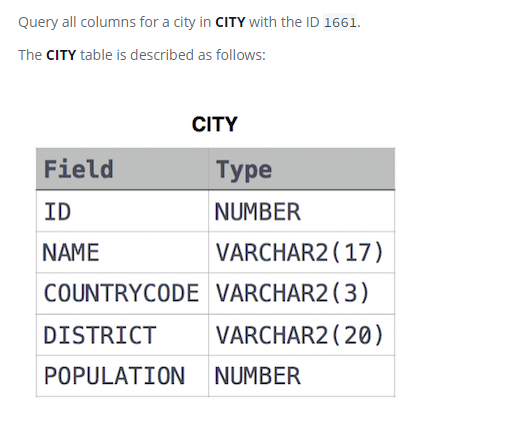

In [ ]:
Select * from city where ID="1661";

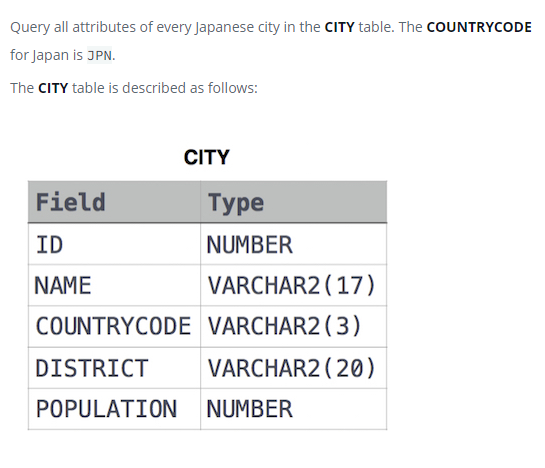

In [ ]:
Select * from city where countrycode="JPN" ;

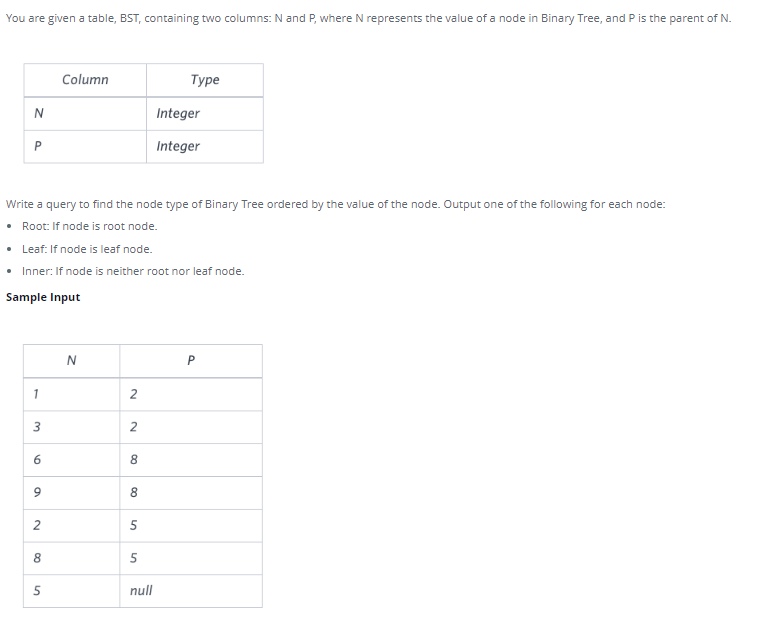

In [ ]:
select n,
case
when p is null then 'Root'
when n in (select p from bst) then 'Inner'
else 'Leaf'
end
from bst
order by n

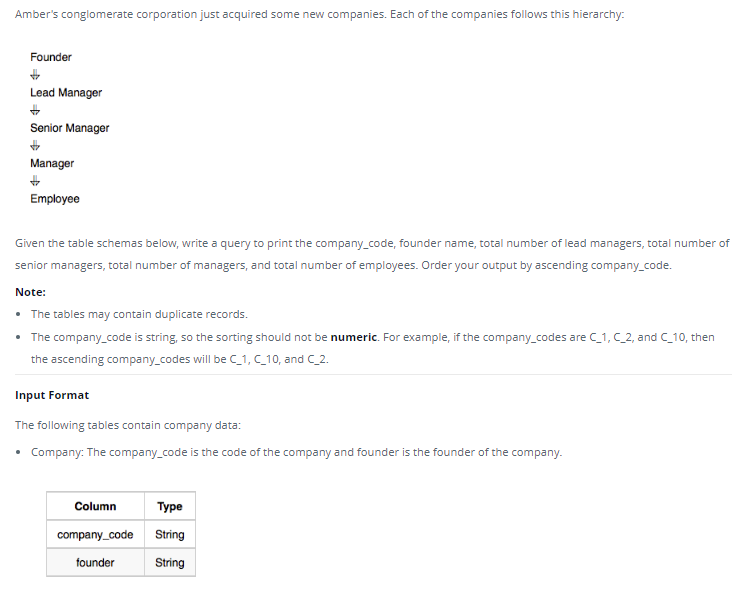
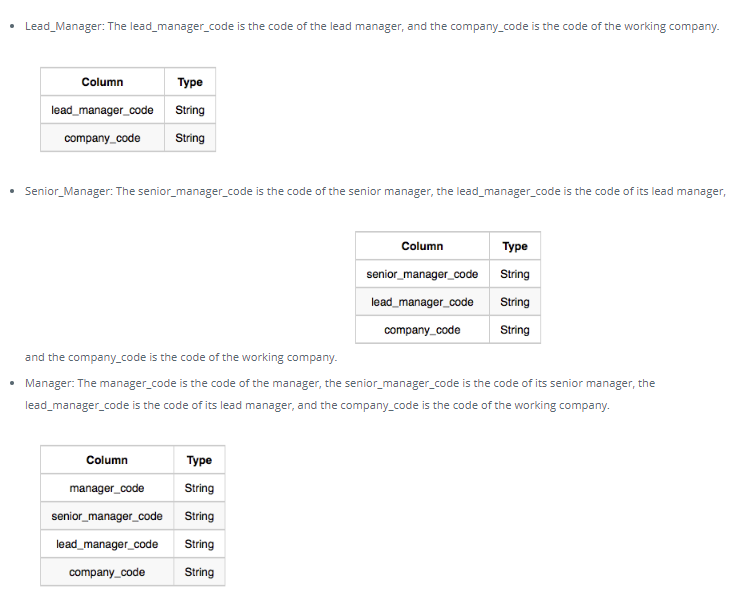
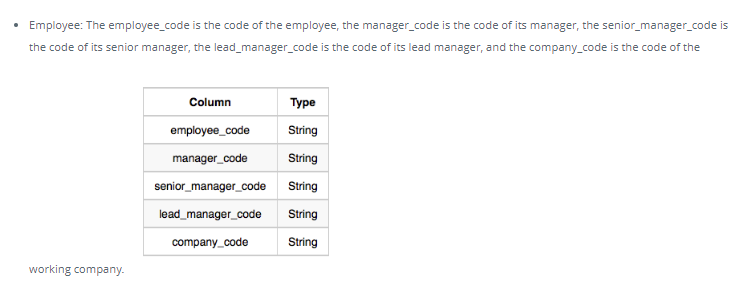

In [ ]:
select c1.company_code, c1.founder, count(distinct e1.lead_manager_code),
count(distinct e1.senior_manager_code),count(distinct e1.manager_code),count(distinct e1.employee_code)
from employee as e1
join company as c1 on e1.company_code=c1.company_code
group by c1.company_code, c1.founder


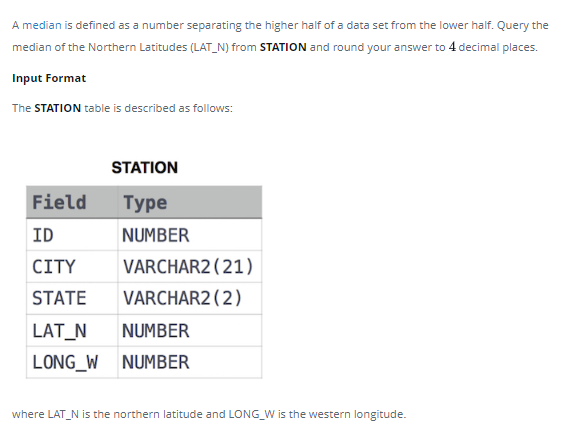

In [ ]:
set @rn:=0;
select round(avg(a.lat_n),4)
from
(
select @rn:= @rn+1 as rowIndex, lat_n from station 
order by lat_n
)as a
where rowIndex in (floor((@rn+1)/2),ceiling((@rn+1)/2));

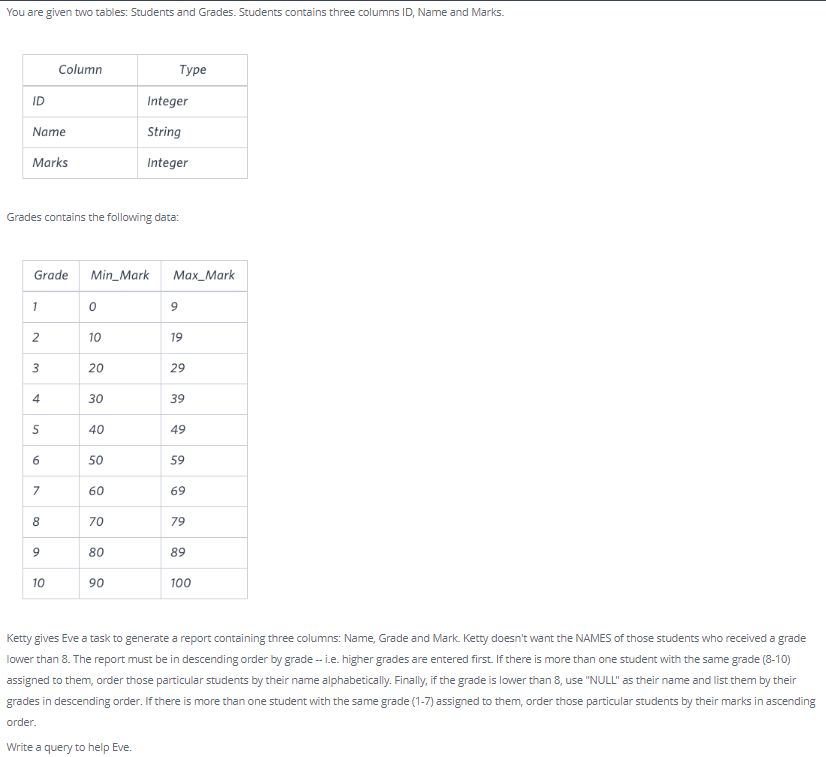

In [ ]:
Select
if(grade>=8,name,NULL),
grade,marks
from
(
select name, 
if(marks<100,(floor(marks/10)+1),10) as grade,
marks
from students
) as temp
order by grade desc,name

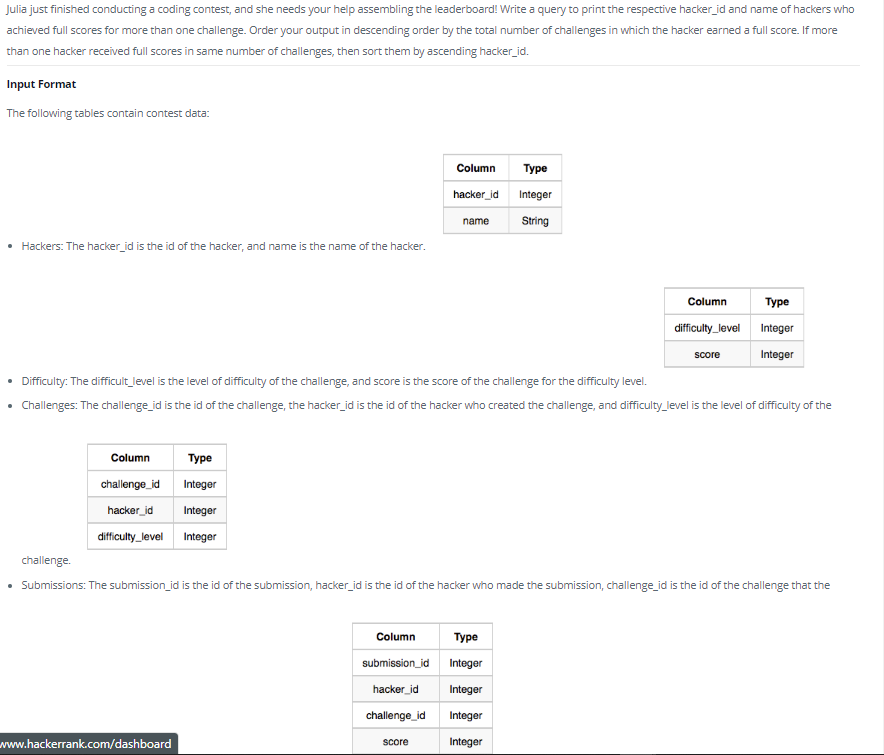

In [ ]:
select s.hacker_id, h.name
from submissions as s
join hackers as h on s.hacker_id=h.hacker_id
join challenges as c on c.challenge_id=s.challenge_id
join difficulty as d on c.difficulty_level=d.difficulty_level
where s.score=d.score
group by s.hacker_id, h.name
having count(s.challenge_id)>1
order by count(s.challenge_id) desc, s.hacker_id asc

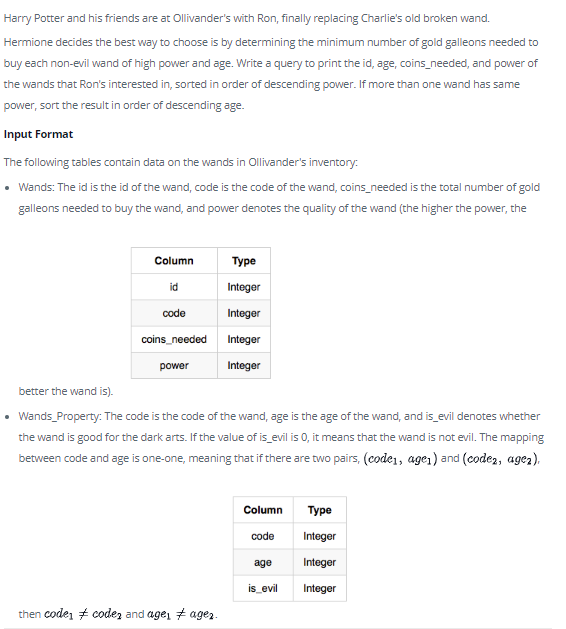

In [ ]:
SELECT
    w.id, p.age, w.coins_needed, w.power
FROM
    Wands w INNER JOIN Wands_Property p ON w.code = p.code
WHERE
    w.coins_needed = (SELECT MIN(coins_needed)
                    FROM Wands w2 INNER JOIN Wands_Property p2 ON w2.code = p2.code
                    WHERE p2.is_evil = 0 AND w.power = w2.power AND p.age = p2.age)
ORDER BY
    w.power DESC, p.age DESC

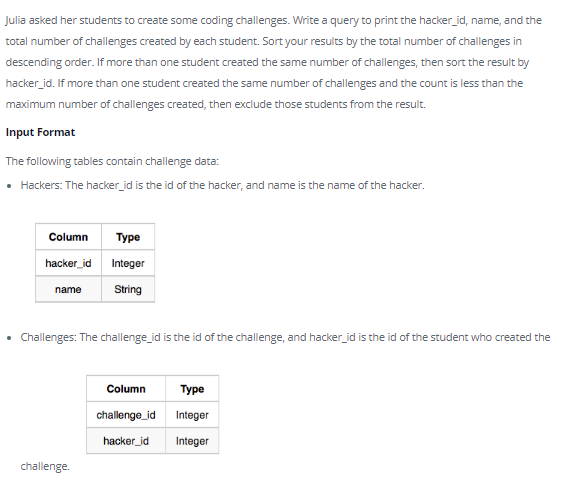

In [ ]:
with t1 as
(
select h.hacker_id,h.name,count(*) as tot_chal
from hackers as h
join challenges as c on h.hacker_id=c.hacker_id
group by h.hacker_id,h.name
), 
t2 as
(
select t1.tot_chal from t1 
    where (t1.tot_chal <> (select max(t1.tot_chal) from t1))
          group by t1.tot_chal 
          having count(*)<2
)
select * 
from t1
where tot_chal in ((select * from t2)union(select max(t1.tot_chal) from t1))
order by t1.tot_chal desc,t1.hacker_id

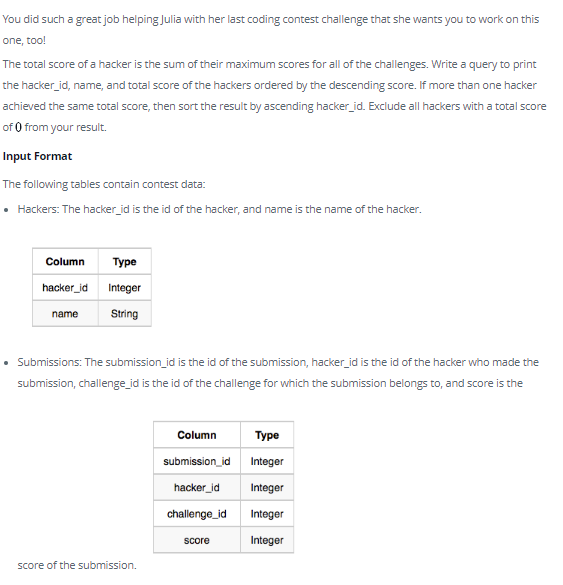

In [ ]:
select t1.hacker_id,t1.name, sum(m_score)
from
(
select s.hacker_id,h.name,s.challenge_id, max(s.score) as m_score
from submissions as s
join hackers as h on s.hacker_id=h.hacker_id
group by s.hacker_id,h.name,s.challenge_id
) as t1
group by t1.hacker_id,t1.name
having sum(m_score)>0
order by sum(m_score) desc, t1.hacker_id

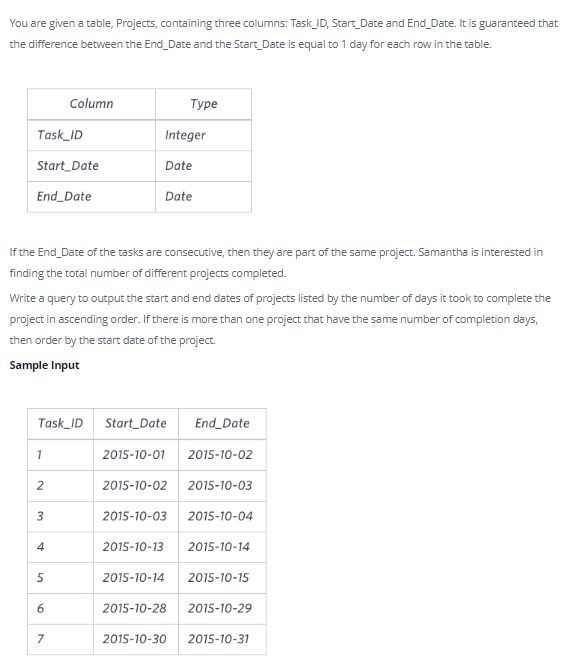

In [ ]:
with
t2 as 
(
select row_number() over (order by start_date) as rw1, start_date from projects where start_date not in (select end_date from   projects)
),
t3 as 
(
select row_number() over (order by end_date) as rw2, end_date from projects where end_date not in (select start_date from projects)
)
select t2.start_date, t3.end_date from t2 join t3 on t2.rw1=t3.rw2
order by datediff(day,t2.start_date,t3.end_date) asc,t2.start_date

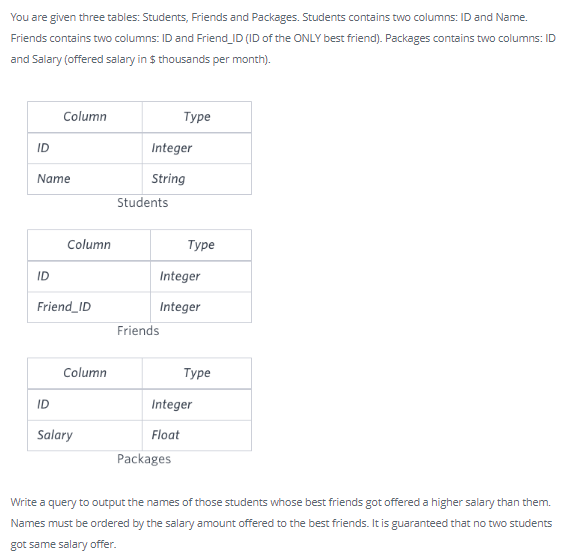

In [ ]:
select s.name
from students as s
join packages as p on s.id=p.id
join friends as f on s.id=f.id
join packages as p1 on f.Friend_ID=p1.id
where p.salary<p1.salary
order by p1.salary

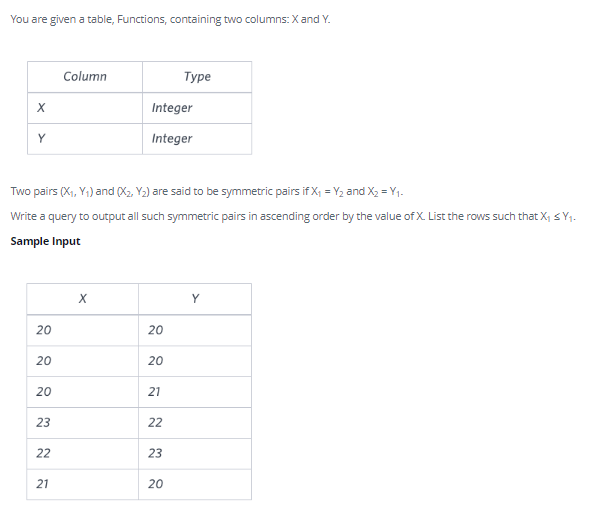

In [ ]:
select *
from
(
(select P1.X,P1.Y 
from functions as P1
join functions as P2 on P1.X=P2.Y and P1.Y=P2.X
where P1.X !=P1.Y
order by P1.X asc)
union
(select P3.X,P3.Y from functions as P3 where P3.X=P3.Y group by P3.X,P3.Y having count(*)>1)
)as temp
where X<=Y
order by X,Y


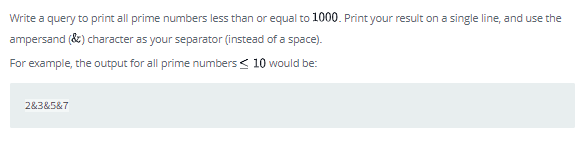

In [ ]:
DELIMITER $$
CREATE PROCEDURE dowhile(n int)
BEGIN
  DECLARE v1 INT DEFAULT 1; 
  DECLARE f INT DEFAULT 0; 
  DECLARE c INT DEFAULT 1;
  DECLARE val varchar(2000) default "";
  while v1<n do             
  set v1=v1+1;               
  set c=1;
          WHILE c <= floor(v1/2) DO  
         set f=f+ if(mod(v1,c)=0,1,0); 
            SET c = c + 1;               
           END WHILE;
  set val=concat(val,if(f=1,concat(v1,"&"),""));
  set f=0;
  end while;
  set val=left(val,length(val)-1);
  select val;
END $$
DELIMITER ;
call dowhile(1000);

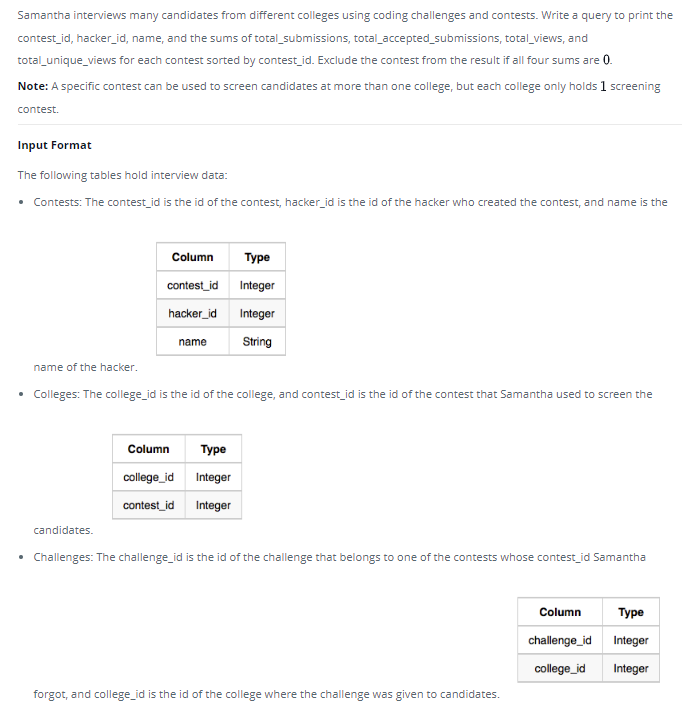
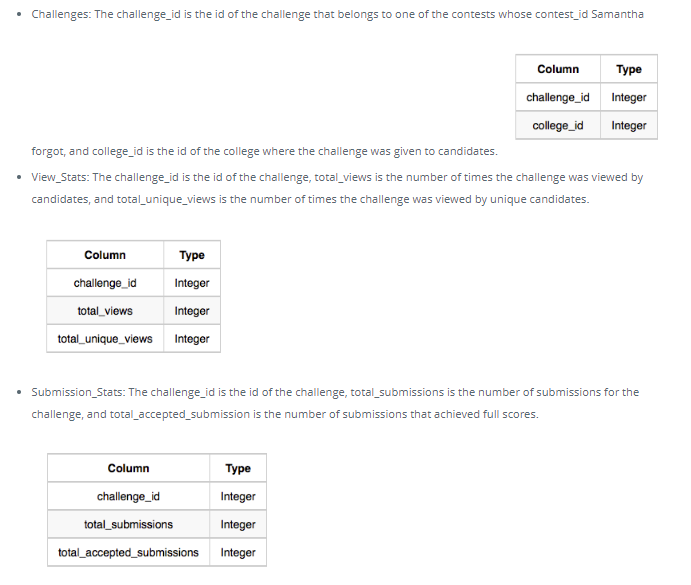

In [ ]:
select c.contest_id, c.hacker_id,c.name,sum(tot_subs), sum(tot_accp_subs),sum(tot_views),sum(tot_unq_views)
from contests as c
join colleges as cg on c.contest_id=cg.contest_id
join challenges as ch on cg.college_id=ch.college_id
left join
(
select v.challenge_id,sum(v.total_views) as tot_views,sum(v.total_unique_views) as tot_unq_views
from view_stats as v
group by v.challenge_id
) as sum_views on ch.challenge_id=sum_views.challenge_id
left join
(
select s.challenge_id,sum(s.total_submissions) as tot_subs,sum(s.total_accepted_submissions) as tot_accp_subs
from submission_stats as s
group by s.challenge_id
) as sum_submissions on ch.challenge_id=sum_submissions.challenge_id
group by c.contest_id, c.hacker_id,c.name
having (sum(tot_subs)+sum(tot_accp_subs)+sum(tot_views)+sum(tot_unq_views))>0
order by c.contest_id


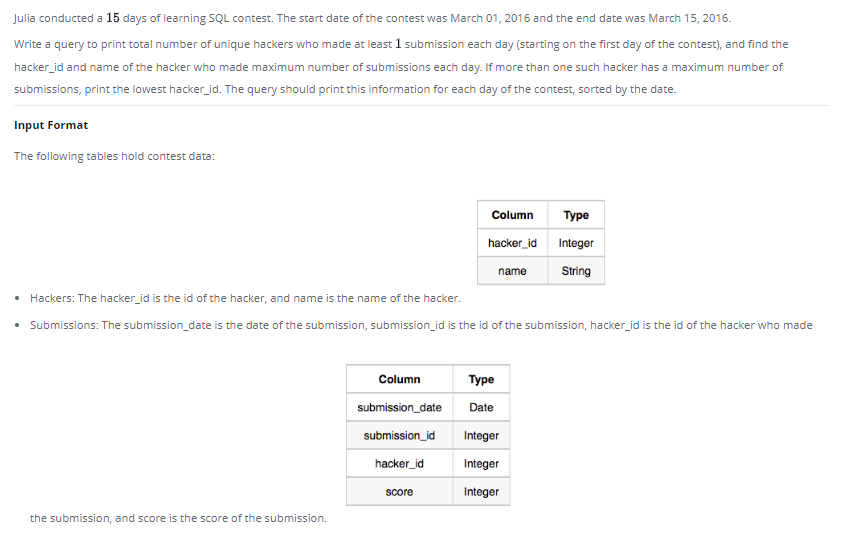

In [ ]:
with 
dates as
(
    select distinct (submission_date)
    from submissions
),
full_table as 
(
    select s.submission_date,s.hacker_id,h.name, count(s.submission_id) as tot_submissions
    from submissions as s
    join hackers as h on s.hacker_id=h.hacker_id
    group by s.submission_date,s.hacker_id,h.name
),
max_submissions as
(
    select full_table.submission_date, max(full_table.tot_submissions) as max_sub
    from full_table
    group by full_table.submission_date
),
max_sub as
(
select ft.submission_date,ft.hacker_id, ft.name, ft.tot_submissions, rank() over(partition by ft.submission_date order by ft.hacker_id ) as ranking
from full_table as ft
join max_submissions as ms on ft.submission_date= ms.submission_date and ft.tot_submissions=ms.max_sub
),
t1 as
(
select f1.submission_date,f1.hacker_id,datediff(day,'2016-03-01',f1.submission_date)+1 as day_diff,count(f1.hacker_id)over(partition by f1.hacker_id order by f1.submission_date) as hacker_streak, ((datediff(day,'2016-03-01',f1.submission_date)+1)-(count(f1.hacker_id)over(partition by f1.hacker_id order by f1.submission_date)))as everyday_label
from full_table as f1
),
t2 as
(
    select t1.submission_date,count(distinct t1.hacker_id) as reg_hackers
    from t1
    where t1.everyday_label=0
    group by t1.submission_date
)


select t2.submission_date, t2.reg_hackers,mss.hacker_id,mss.name
from t2
join max_sub as mss on t2.submission_date=mss.submission_date
where mss.ranking=1
order by t2.submission_date
;
